In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('process.csv',header=None,sep='\t')

In [3]:
data_1=data[0].to_list()

In [4]:
data_1[4].split(' ')

['OK:',
 'rms_server',
 'rms_server.cfg',
 'running',
 'as',
 'tradesrv1',
 '(expected:1',
 'running:1)']

In [5]:
for i in data_1[4].split(' '):
    print(i)

OK:
rms_server
rms_server.cfg
running
as
tradesrv1
(expected:1
running:1)


In [6]:
data_1[0].split(' ')[0:2]

['OK:', 'nse_native_trade_server']

In [7]:
len(data_1)

12

In [8]:
d={}
d['Status']=[]
d['Process']=[]
d['TS_ID_User']=[]
d['Expected']=[]
d['Actual']=[]
for i in range(len(data_1)):
    for j in range(len(data_1[i].split(' '))):
        if j==0:
            d['Status'].append(data_1[i].split(' ')[j])
        elif j==1:
            d['Process'].append(data_1[i].split(' ')[j])
        elif j==5:
            d['TS_ID_User'].append(data_1[i].split(' ')[j])
        elif j==6:
            d['Expected'].append(data_1[i].split(' ')[j])
        elif j==7:
            d['Actual'].append(data_1[i].split(' ')[j])


In [9]:
df=pd.DataFrame(d)

In [10]:
df

,Status,Process,TS_ID_User,Expected,Actual
0,OK:,nse_native_trade_server,tradesrv1,(expected:1,running:1)
1,OK:,nse_native_trade_server,tradesrv2,(expected:1,running:1)
2,OK:,nse_native_trade_server,tradesrv3,(expected:1,running:1)
3,OK:,nse_native_trade_server,tradesrv4,(expected:1,running:1)
4,OK:,rms_server,tradesrv1,(expected:1,running:1)
5,OK:,rms_server,tradesrv2,(expected:1,running:1)
6,OK:,rms_server,tradesrv3,(expected:1,running:1)
7,OK:,rms_server,tradesrv4,(expected:1,running:1)
8,OK:,new_options_trader,running,as,opt_trader
9,OK:,new_options_trader,running,as,opt_trader


In [11]:
df['Status']=df['Status'].apply(lambda x:x[:-1])

In [12]:
df['Expected']=df['Expected'].apply(lambda x:x[-1])

In [13]:
df['Actual']=df['Actual'].apply(lambda x:x[-2])

In [14]:
df

,Status,Process,TS_ID_User,Expected,Actual
0,OK,nse_native_trade_server,tradesrv1,1,1
1,OK,nse_native_trade_server,tradesrv2,1,1
2,OK,nse_native_trade_server,tradesrv3,1,1
3,OK,nse_native_trade_server,tradesrv4,1,1
4,OK,rms_server,tradesrv1,1,1
5,OK,rms_server,tradesrv2,1,1
6,OK,rms_server,tradesrv3,1,1
7,OK,rms_server,tradesrv4,1,1
8,OK,new_options_trader,running,s,e
9,OK,new_options_trader,running,s,e


In [15]:
df=df[~(df['Expected']!='1')]

In [16]:
df['Process']

0     nse_native_trade_server
1     nse_native_trade_server
2     nse_native_trade_server
3     nse_native_trade_server
4                  rms_server
5                  rms_server
6                  rms_server
7                  rms_server
11                    nse_tbt
Name: Process, dtype: object

In [17]:
TS_list=list(set(df['TS_ID_User'].to_list()))

In [18]:
list(TS_list)

['tradesrv2', 'tradesrv1', 'tradesrv3', 'opt_trader', 'tradesrv4']

In [ ]:
if TS_list[i] not in ['opt_trader','granite_trader','option_trader']:
        df['Process']=TS_list[i]

    if(df[(df['Process']=='rms_server') & (df['TS_ID_User']==TS_list[i])]):
        if TS_list[i] not in ['opt_trader','granite_trader','option_trader']:
        df['Process']=TS_list[i]

In [19]:
df['Procee']=df[(df['Process']=='nse_native_trade_server') & (df['TS_ID_User']==TS_list[1])]['Process'].replace('nse_native_trade_server',TS_list[1])

<ipython-input-19-13572364664b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Procee']=df[(df['Process']=='nse_native_trade_server') & (df['TS_ID_User']==TS_list[1])]['Process'].replace('nse_native_trade_server',TS_list[1])


In [25]:
df=df.drop('Procee',axis=1)

In [26]:
df[(df['Process']=='nse_native_trade_server') & (df['TS_ID_User']==TS_list[1])]['Process'].replace('nse_native_trade_server',TS_list[2])

0    tradesrv3
Name: Process, dtype: object

In [22]:
df

,Status,Process,TS_ID_User,Expected,Actual,Procee
0,OK,nse_native_trade_server,tradesrv1,1,1,tradesrv3
1,OK,nse_native_trade_server,tradesrv2,1,1,NaN
2,OK,nse_native_trade_server,tradesrv3,1,1,NaN
3,OK,nse_native_trade_server,tradesrv4,1,1,NaN
4,OK,rms_server,tradesrv1,1,1,NaN
5,OK,rms_server,tradesrv2,1,1,NaN
6,OK,rms_server,tradesrv3,1,1,NaN
7,OK,rms_server,tradesrv4,1,1,NaN
11,OK,nse_tbt,opt_trader,1,1,NaN


In [89]:
df['Expected']=df['Expected'].astype('int')
df['Actual']=df['Actual'].astype('int')

<ipython-input-89-a88e26931e40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Expected']=df['Expected'].astype('int')
<ipython-input-89-a88e26931e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Actual']=df['Actual'].astype('int')


In [ ]:
df[]

In [86]:
import seaborn as sns

/home/pkumari/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Actual', ylabel='TS_ID_User'>

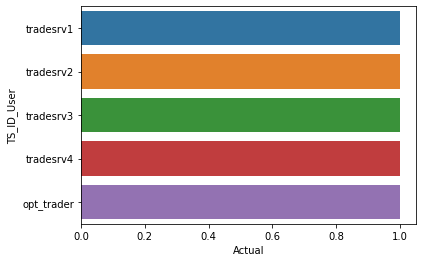

In [91]:
sns.barplot(df['Actual'],df['TS_ID_User'])

In [5]:
import re
a='B'
if re.compile("[a-z|A-Z]").fullmatch(a):
    print('Yes')

Yes


In [8]:
import re
p= input("Input your password")
x = True
while x:  
    if (len(p)<6 or len(p)>12):
        break
    elif not re.search("[a-z]",p):
        break
    elif not re.search("[0-9]",p):
        break
    elif not re.search("[A-Z]",p):
        break
    elif not re.search("[$#@]",p):
        break
    elif re.search("\s",p):
        break
    else:
        print("Valid Password")
        x=False
        break

if x:
    print("Not a Valid Password")

Input your password12345678
Not a Valid Password
